# <u>Ensemble Learning</u>

If we aggregate the predictions of a group of predictors (classifiers / regressors), we will <u> often</u> get better predictions than with the best individual predictor. A group of predictor is called an ensemble, the technique of aggregation is called Ensemble Learning, and an Ensemble Learning algorithm is called an Ensemble method.

<b>Ensemble methods work best when the predictors are as independent from one another as possible. Training the dataset using very different classifiers increases the chance of them making very different types of errors, improving ensemble’s accuracy.</b>

<u>Ensemble methods can be divided into two groups: </u>

- <b> Sequential ensemble methods </b> where the base learners are generated sequentially (e.g. AdaBoost).
  - The basic motivation of sequential methods is to <u> exploit the dependence between the base learners </u>. The overall performance can be boosted by weighing previously mislabeled examples with higher weight.

- <b> Parallel ensemble methods </b> where the base learners are generated in parallel (e.g. Random Forest).
  - The basic motivation of parallel methods is to <u> exploit independence between the base learners </u> since the error can be reduced dramatically by averaging.

## <u>Voting Classifiers</u> :
Train a few classifiers (Logistic Regression classifier, SVM classifier, Random Forest classifier, K-Nearest Neighbors classifier etc.) on the training set.

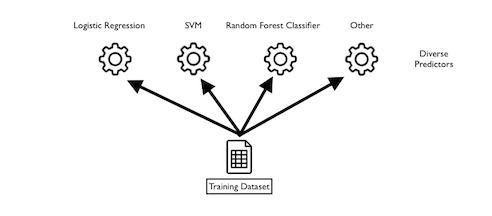

 Aggregate the predictions of each classifier and predict the class that gets the most votes. This majority vote classifier is called a hard voting classifier.
 
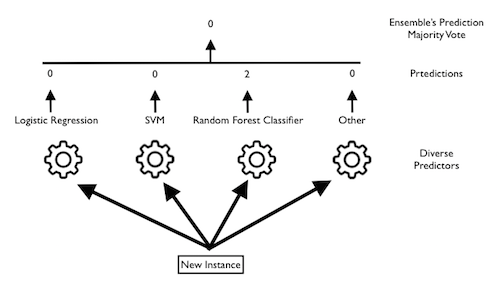

This voting classifier often achieves a higher accuracy than the best classifier in the ensemble. Even if each classifier is a weak learner (it does only slightly better than random guessing), the ensemble can still be a strong learner (achieving high accuracy), provided there are a sufficient number of weak learners and they are sufficiently diverse.

In [1]:
# Load the MNIST dataset
import numpy as np

try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1)
    mnist.target = mnist.target.astype(np.int64)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

In [2]:
# Split 50,000 instances for training, 10,000 for validation, and 10,000 for testing.

from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split( mnist.data, mnist.target, test_size=10000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split( X_train_val, y_train_val, test_size=10000, random_state=42)

In [3]:
# Train Random Forest classifier, Extra-Trees classifier, SVM and MLP

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

random_forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=10, random_state=42)
svm_clf = LinearSVC(random_state=42)
mlp_clf = MLPClassifier(random_state=42)

estimators = [random_forest_clf, extra_trees_clf, svm_clf, mlp_clf]
for estimator in estimators:
    estimator.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [4]:
# .score() method directly calls sklearn.metrics.accuracy_score method.

[estimator.score(X_val, y_val) for estimator in estimators]

[0.9469, 0.9492, 0.8397, 0.9661]

In [5]:
# Combine the classifiers into an ensemble that outperforms them all on the validation set, using a soft or hard voting classifier.

from sklearn.ensemble import VotingClassifier

named_estimators = [ ("random_forest_clf", random_forest_clf), ("extra_trees_clf", extra_trees_clf), ("svm_clf", svm_clf), ("mlp_clf", mlp_clf)]

In [6]:
voting_clf = VotingClassifier(named_estimators)

In [7]:
voting_clf.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=10,
                                                     n_jobs=No

In [8]:
voting_clf.score(X_val, y_val)

0.9638

In [9]:
[estimator.score(X_val, y_val) for estimator in voting_clf.estimators_]

[0.9469, 0.9492, 0.8397, 0.9661]

Linear SVM is far outperformed by the other classifiers. Remove the SVM to see if performance improves.

In [10]:
# remove an estimator by setting it to None using set_params()

voting_clf.set_params(svm_clf=None)

VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=10,
                                                     n_jobs=No

In [11]:
# Updated list of estimators

voting_clf.estimators

[('random_forest_clf',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                         max_depth=None, max_features='auto', max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=10,
                         n_jobs=None, oob_score=False, random_state=42, verbose=0,
                         warm_start=False)),
 ('extra_trees_clf',
  ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                       oob_score=False, random_state=42, verbose=0,
    

In [12]:
# Updated list of trained estimators

voting_clf.estimators_

[RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=10,
                        n_jobs=None, oob_score=False, random_state=42, verbose=0,
                        warm_start=False),
 ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False),
 LinearSVC(C=1.0, cla

In [13]:
# We can either fit the VotingClassifier again, or just remove the SVM from the list of trained estimators:

del voting_clf.estimators_[2]

In [14]:
# Recheck

voting_clf.estimators_

[RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=10,
                        n_jobs=None, oob_score=False, random_state=42, verbose=0,
                        warm_start=False),
 ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False),
 MLPClassifier(activa

In [15]:
# Evaluate the VotingClassifier again:

voting_clf.score(X_val, y_val)

0.9641

A bit better! SVM was hurting performance. Let's try using a soft voting classifier.

If all classifiers in the ensemble can estimate class probabilities (predict_proba()), we can set "voting = 'soft'" to predict the class with the highest class probability, averaged over all the individual classifiers. This is called soft voting. It often achieves higher performance than hard voting because it gives more weight to highly confident votes.

In [16]:
# Set voting to "soft"

voting_clf.voting = "soft"
voting_clf.score(X_val, y_val)

0.9705

In [17]:
# Test set

voting_clf.score(X_test, y_test)

0.9683

In [18]:
[estimator.score(X_test, y_test) for estimator in voting_clf.estimators_]

[0.9437, 0.9474, 0.9625]

## <u>Bagging and Pasting</u>
In Bagging/ Pasting,  same training algorithm is used for every predictor(Classifier/ Regressor), but we train them on different random subsets of the training set. When sampling is performed with replacement, the method is called <b> bagging / bootstrap aggregating </b>. When sampling is performed without replacement, it is called <b> pasting </b>.

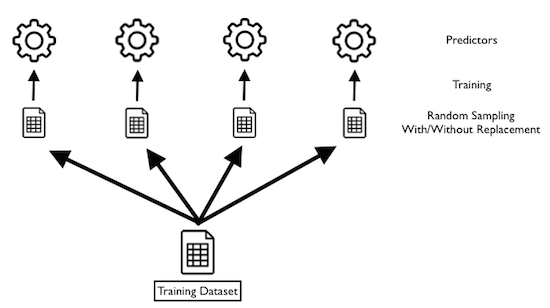

Once all predictors are trained, the ensemble can make a prediction for a new instance by aggregating the predictions of all predictors. The aggregation function is generally the statistical mode (most frequent prediction) for classification, or the statistical mean for regression.

Each individual predictor has a higher bias(underfit) because only a subset of the trining set is trained on it, aggregation reduces both bias and variance. The ensemble has a similar bias but a lower variance than a single predictor trained on the original training set.

Bagging and Pasting scale very well on different CPU cores and servers, all predictors can be trained in parallel, predictions can also be made in parallel.

### <u>Out-of-Bag Evaluation </u>

With bagging, at each iteration, the remaining training instances that are not sampled are called out-of-bag (oob) instances. These instances are not same for all predictors.
Since a predictor never sees the oob instances during training, it can be evaluated on these instances, without the need for a separate validation set or cross-validation. We can evaluate the ensemble itself by averaging out the oob evaluations of each predictor.

In [19]:
from sklearn.tree import DecisionTreeClassifier # Base Classifier for Bagging Method
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Train an ensemble of 500 Decision Tree classifiers.
# BaggingClassifier automatically performs soft voting if the base classifier has a predict_proba() method.
# To train each predictor on a random subset of the input features, use max_features(0-1). Useful if training set has high dimentional features.
# "n_estimators = 500" was taking lot of CPU time, I used "n_estimators = 10" for demonstration purpose.
# bootstrap = True (Bagging)
clf_bagging = BaggingClassifier( DecisionTreeClassifier(), n_estimators = 10, max_samples = 0.8, bootstrap = True, oob_score=True, n_jobs = -1)
# bootstrap = False (Pasting)
clf_pasting = BaggingClassifier( DecisionTreeClassifier(), n_estimators = 10, max_samples = 0.8, bootstrap = False, n_jobs = -1)

clf_bagging.fit(X_train, y_train)
clf_pasting.fit(X_train, y_train)

y_pred_bagging = clf_bagging.predict(X_val)
y_pred_pasting = clf_bagging.predict(X_val)


clf_bagging.oob_score_, accuracy_score(y_val, y_pred_bagging), accuracy_score(y_val, y_pred_pasting)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:616: RuntimeWarning: divide by zero encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:616: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


(0.90392, 0.9375, 0.9375)

In [20]:
# The decision function returns the class probabilities (if base estimator has a predict_proba() method) for each training instance. 
clf_bagging.oob_decision_function_[112]
#y_train[112]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
# import matplotlib as mpl

# some_digit = X_train[112]
# some_digit_image = some_digit.reshape(28, 28)
# plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
# plt.axis("off")

# plt.show()

## <u> Random Forests </u>
Random Forest is an ensemble of Decision Trees.

Instead of building a BaggingClassifier and passing it a DecisionTreeClassifier, we can instead use the RandomForestClassifier class, which is more convenient and optimized for Decision Trees.

RandomForestClassifier has all the hyperparameters of a DecisionTreeClassifier (to control how trees are grown), plus all the hyperparameters of a BaggingClassifier to control the ensemble itself.

In an <b> extremely randomized trees </b> algorithm randomness goes one step further: the splitting thresholds are randomized. Instead of looking for the most discriminative threshold, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule. This usually allows reduction of the variance of the model a bit more, at the expense of a slightly greater increase in bias.

In [22]:
#  Trains a Random Forest classifier with 500 trees (each limited to maximum 16 nodes), using all available CPU cores:

from sklearn.ensemble import RandomForestClassifier

clf_randomforest = RandomForestClassifier(n_estimators=10, n_jobs=-1)
clf_randomforest.fit(X_train, y_train)
y_pred_rf = clf_randomforest.predict(X_val)

accuracy_score(y_val, y_pred_rf)

0.9459

### <u>Feature Importance</u>

If we look at a single Decision Tree, important features are likely to appear closer to the root of the tree, while unimportant features will often appear closer to the leaves (or not at all). It is possible to get an estimate of a feature’s importance by computing the average depth at which it appears across all trees in the forest.

In [23]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.10644334935875233
sepal width (cm) 0.026126765074286094
petal length (cm) 0.40393106431606385
petal width (cm) 0.46349882125089764


## <u>Boosting</u>
Boosting refers to a family of algorithms that are able to convert weak learners to strong learners. The main principle of boosting is to fit a sequence of weak learners− models that are only slightly better than random guessing, such as small decision trees to weighted versions of the data. More weight is given to examples that were misclassified by earlier rounds.

The predictions are then combined through a weighted majority vote (classification) or a weighted sum (regression) to produce the final prediction. 

Boosting technique cannot be parallelized (or only partially) because each predictor can only be trained after the previous predictor has been trained and evaluated. As a result, it does not scale as well as bagging / pasting.

### <u> AdaBoost </u>

The predictors(classifier/ regressor) fit the training set in sequence. The next predictor corrects its predecessor by paying more attention to the training instances that the predecessor underfitted. This results in new predictors focusing more and more on the hard cases.

To build an AdaBoost classifier, each instance's weight is set to an initial value. A base classifier (eg. Decision Tree) is trained and makes predictions on the training set. The relative weight of misclassified training instances is then increased. The second classifier is trained on the training set using the updated weights and again it makes predictions on the training set and update the weights. The algorithm stops when the desired number of predictors is reached, or when a perfect predictor is found.

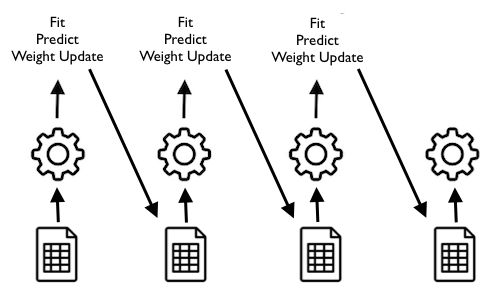

This sequential learning technique is similar to Gradient Descent, except that instead of tweaking a single predictor’s parameters to minimize a cost function, AdaBoost adds more predictors to the ensemble, gradually making it better.

<b><u> Algorithm </u></b>:

- Each instance weight $w^{(i)}$ is initially set to $\frac{1}{m}$ (m = number of instances) . The first predictor is trained and its weighted error rate $r_1$ is computed on the training set:

$$\text{ Weighted error rate for $j^{th}$ predictor:   } r_j = \frac{\hat{y_j}^i \neq y^i}{\sum_{i=1}^{m} w^i} $$

where ${y_j}^i$ is the $j^{th}$ predictor’s prediction for the $i^{th}$ instance.

- The predictor’s weight $\alpha_j$ is then computed using its weighted error rate , where $\eta$ is the learning rate hyperparameter (defaults to 1).
  - Predictor guessing accurately - Higher weight
  - Predictor guessing randomly - Weight close to 0
  - Predictor guessing mostly wrong - Negative weights

$$\text{ Predictor weight:   } \alpha_j = \eta \log\frac{1 - r_j}{r_j} $$

- The instance weights are updated using above equation and the misclassified instance' weights are boosted.

$$\text{ Weight update rule:   } w^{i}  \leftarrow 
  \begin{cases}
    w^i       & \quad \text{if }  \hat{y_j}^i = y^i\\
    w^i \exp(\alpha_j)  & \quad \text{if } \hat{y_j}^i \neq y^i
  \end{cases}
$$

- All the instance weights are normalized (divided by $\sum_{i=1}^{m} w^i$).

A new predictor is trained using the updated weights, and the whole process is repeated (the new predictor’s weight is computed, the instance weights are updated, then another predictor is trained. 

To make predictions, AdaBoost simply computes the predictions of all the predictors and weighs them using their predictor weights $\alpha_j$. The predicted class is the one that receives the majority of weighted votes.

Scikit-Learn uses a multiclass version of AdaBoost - SAMME. When there are just two classes, SAMME is equivalent to AdaBoost. If the predictors can estimate class probabilities (if they have a predict_proba() method), Scikit-Learn can use a variant of SAMME called SAMME.R, which relies on class probabilities rather than predictions and generally performs better.

The following code using Scikit-Learn’s AdaBoostClassifier class (as you might expect, there is also an Ada BoostRegressor class). A Decision Stump is a Decision Tree with max_depth=1—in other words, a tree composed of a single decision node plus two leaf nodes. This is the default base estimator for the AdaBoostClassifier class:

In [24]:
# Train a classifier based on 200 Decision Trees 

from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier( DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_val)
accuracy_score(y_val, y_pred_ada)

0.7917

If AdaBoost ensemble underfits the training data, you can try increasing the number of estimators or reducing the regularization hyperparameters of the base estimator. You may also try slightly increasing the learning rate.

### Gradient Boosting
Gradient Boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor. However, instead of tweaking the instance weights at every iteration like AdaBoost, Gradient Boosting tries to fit the new predictor to the residual errors made by the previous predictor.

In [25]:
import numpy as np

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [26]:
from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Now train a second DecisionTreeRegressor on the residual errors made by the first
predictor:

In [27]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Then we train a third regressor on the residual errors made by the second predictor:

In [28]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Now we have an ensemble containing three trees. It can make predictions on a new instance simply by adding up the predictions of all the trees:

In [29]:

X_new = np.array([[0.8]])

y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred

array([0.75026781])

The following code creates the same ensemble as the previous one:

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

The learning_rate hyperparameter scales the contribution of each tree. If we set it to a low value(0.1) we will need more trees in the ensemble to fit the training set, but the predictions will usually generalize better. This is a regularization technique called shrinkage.

If Gradient Boosting ensemble overfits the training set, we should try decreasing the learning rate. We could also use early stopping to find the right number of predictors.

In [31]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [32]:
import matplotlib.pyplot as plt


def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(11,11))

<Figure size 792x792 with 0 Axes>

<Figure size 792x792 with 0 Axes>

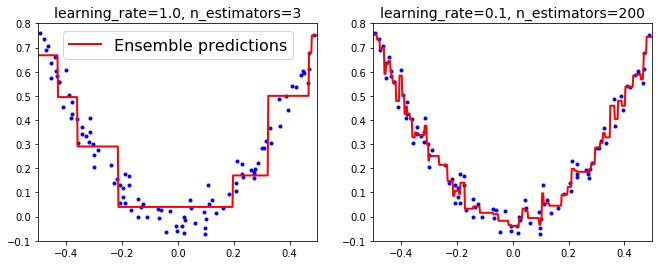

In [33]:

plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)

#save_fig("gbrt_learning_rate_plot")
plt.show()

In order to find the optimal number of trees, you can use early stopping (see Chap‐ ter 4). A simple way to implement this is to use the staged_predict() method: it returns an iterator over the predictions made by the ensemble at each stage of train‐ ing (with one tree, two trees, etc.). The following code trains a GBRT ensemble with 120 trees, then measures the validation error at each stage of training to find the opti‐ mal number of trees, and finally trains another GBRT ensemble using the optimal number of trees:

In [34]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_val, y_train, y_val = train_test_split(X, y)
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)
errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors)
gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=84,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [35]:
min_error = np.min(errors)

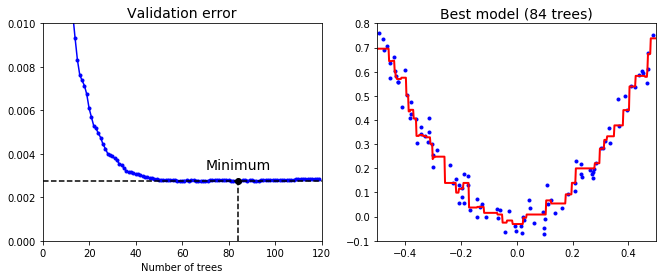

In [36]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)

plt.show()

In [37]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

In [38]:
print(gbrt.n_estimators)

69


In [39]:
print("Minimum validation MSE:", min_val_error)

Minimum validation MSE: 0.002750279033345716


### Stacking

Stacking is an ensemble learning technique that uses predictions from multiple models (for example decision tree, knn or svm) to build a new model. This model is used for making predictions on the test set.

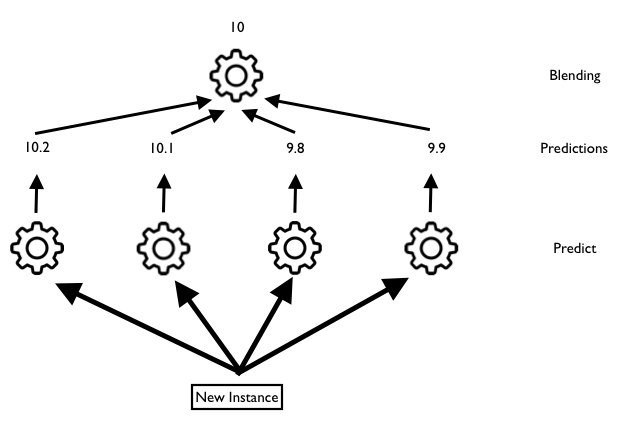

First, the training set is split in two subsets. The first subset is used to train the predictors in the first layer. Next, the predictors in the first layer are used to make predictions on the second(hold-out) set. Now (in example above) for each instance in the hold-out set there are four predicted values. A new training set is created using these predicted values as input features and keeping the target values. The blender is trained on this new training set, it learns to predict the target value where inputs are the the first layer’s predictions.

It is possible to train several different blenders on the top of one another (e.g., one using Linear Regression, another using Random Forest Regression etc). The training set should be divided equal to the number of layers(see image above).

In [40]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

In [41]:
X_train_val, X_test, y_train_val, y_test = train_test_split( mnist.data, mnist.target, test_size=10000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split( X_train_val, y_train_val, test_size=10000, random_state=42)

In [42]:
random_forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=10, random_state=42)
mlp_clf = MLPClassifier(random_state=42)

In [43]:
estimators = [random_forest_clf, extra_trees_clf, mlp_clf]
for estimator in estimators:
    print("Training the", estimator)
    estimator.fit(X_train, y_train)

Training the RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Training the ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)
Training th

In [44]:
[estimator.score(X_val, y_val) for estimator in estimators]

[0.9469, 0.9492, 0.9661]

In [45]:
X_val_predictions = np.empty((len(X_val), len(estimators)), dtype=np.float32)

for index, estimator in enumerate(estimators):
    X_val_predictions[:, index] = estimator.predict(X_val)

In [46]:
X_val_predictions

array([[5., 5., 5.],
       [8., 8., 8.],
       [2., 2., 2.],
       ...,
       [7., 7., 7.],
       [6., 6., 6.],
       [7., 7., 7.]], dtype=float32)

In [47]:
rnd_forest_blender = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)
rnd_forest_blender.fit(X_val_predictions, y_val)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [48]:
rnd_forest_blender.oob_score_

0.9651

We can fine-tune this blender or try other types of blenders (e.g., an MLPClassifier), then select the best one using cross-validation, as always.

We have trained a blender, and together with the classifiers they form a stacking ensemble.

Let's evaluate the ensemble on the test set. For each image in the test set, make predictions with all our classifiers, then feed the predictions to the blender to get the ensemble's predictions.

In [49]:
X_test_predictions = np.empty((len(X_test), len(estimators)), dtype=np.float32)

for index, estimator in enumerate(estimators):
    X_test_predictions[:, index] = estimator.predict(X_test)

In [50]:
y_pred = rnd_forest_blender.predict(X_test_predictions)

In [51]:
accuracy_score(y_test, y_pred)

0.9621

### End
If you reached this far please comment and upvote this kernel, feel free to make improvements on the kernel and please share if you found anything useful !